In [116]:
## Importing Libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
## Loading the Dataset:-
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [118]:
##Analysing and cleaning the Dataset:-
## Checking the Datatypes:-

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [119]:
## Checking the shape of dataset:-

df.shape

(4340, 8)

In [120]:
## Converting price in Lacks rupees:- selling_price/100000

df['selling_price_in_lacks']=df['selling_price']/100000

## Conveting km_driven in lacks of km.:- km_driven/100000

df['km_driven_in_lacks']=df['km_driven']/100000

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_in_lacks,km_driven_in_lacks
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60,0.70
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35,0.50
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00,1.00
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50,0.46
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4.50,1.41


In [121]:
## Checking the null values:-

df.isnull().sum()

name                      0
year                      0
selling_price             0
km_driven                 0
fuel                      0
seller_type               0
transmission              0
owner                     0
selling_price_in_lacks    0
km_driven_in_lacks        0
dtype: int64

In [122]:
## Checking the categorical columns:-

df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [123]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [124]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [125]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [126]:
df['name'].value_counts().head(20)

Maruti Swift Dzire VDI            69
Maruti Alto 800 LXI               59
Maruti Alto LXi                   47
Maruti Alto LX                    35
Hyundai EON Era Plus              35
Maruti Swift VDI BSIV             29
Maruti Wagon R VXI BS IV          29
Maruti Swift VDI                  27
Hyundai EON Magna Plus            24
Maruti Wagon R LXI Minor          24
Maruti 800 AC                     23
Maruti Wagon R LXI                23
Maruti Ritz VDi                   22
Mahindra XUV500 W8 2WD            22
Hyundai i10 Magna                 22
Hyundai Santro Xing GLS           21
Renault KWID RXT                  21
Maruti Alto K10 VXI               21
Hyundai Creta 1.6 CRDi SX         19
Renault Duster 85PS Diesel RxL    17
Name: name, dtype: int64

In [127]:
##Data Preprocessing:-
##converting all data in numerical form:-
from sklearn.preprocessing import LabelEncoder

In [128]:
## Making a copy of a dataframe:-

df2=df.copy()

df2=df2.drop(['selling_price','km_driven'],axis=1)
             
le=LabelEncoder()

df2['transmission']=le.fit_transform(df2['transmission'])
df2['seller_type']=le.fit_transform(df2['seller_type'])
df2['fuel']=le.fit_transform(df2['fuel'])
df2['owner']=le.fit_transform(df2['owner'])

In [129]:
df2

,name,year,fuel,seller_type,transmission,owner,selling_price_in_lacks,km_driven_in_lacks
0,Maruti 800 AC,2007,4,1,1,0,0.60000,0.70
1,Maruti Wagon R LXI Minor,2007,4,1,1,0,1.35000,0.50
2,Hyundai Verna 1.6 SX,2012,1,1,1,0,6.00000,1.00
3,Datsun RediGO T Option,2017,4,1,1,0,2.50000,0.46
4,Honda Amaze VX i-DTEC,2014,1,1,1,2,4.50000,1.41
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,1,1,1,2,4.09999,0.80
4336,Hyundai i20 Magna 1.4 CRDi,2014,1,1,1,2,4.09999,0.80
4337,Maruti 800 AC BSIII,2009,4,1,1,2,1.10000,0.83
4338,Hyundai Creta 1.6 CRDi SX Option,2016,1,1,1,0,8.65000,0.90


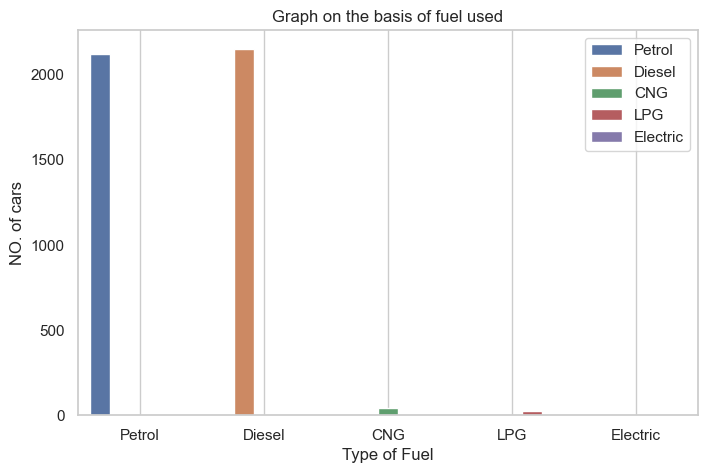

In [130]:
##Performing some EDA on Data:-
##Classify on the basis of fuel used:-
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='fuel',hue='fuel')
plt.legend()
plt.grid()
plt.xlabel('Type of Fuel')
plt.ylabel('NO. of cars')
plt.title('Graph on the basis of fuel used')
plt.show()

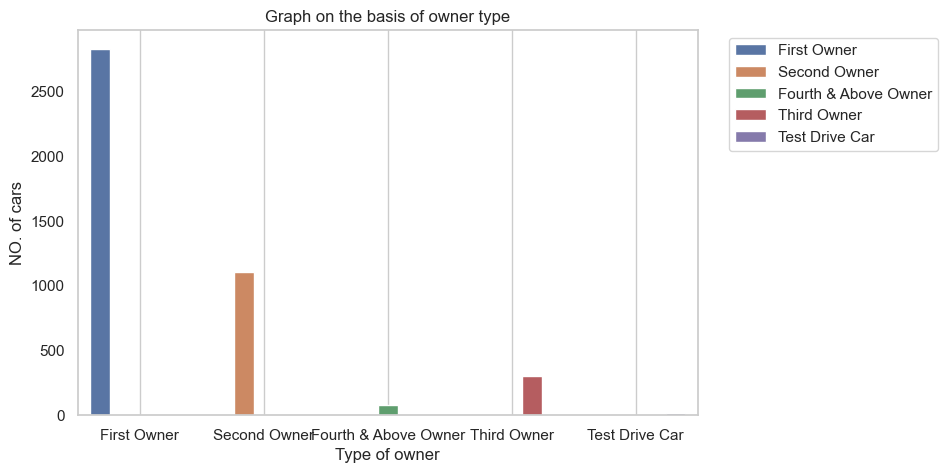

In [131]:
##Classify on the basis of owner type:-
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='owner',hue='owner')
plt.legend(bbox_to_anchor=(1,0,0.4,1))
plt.grid()
plt.xlabel('Type of owner')
plt.ylabel('NO. of cars')
plt.title('Graph on the basis of owner type')
plt.show()

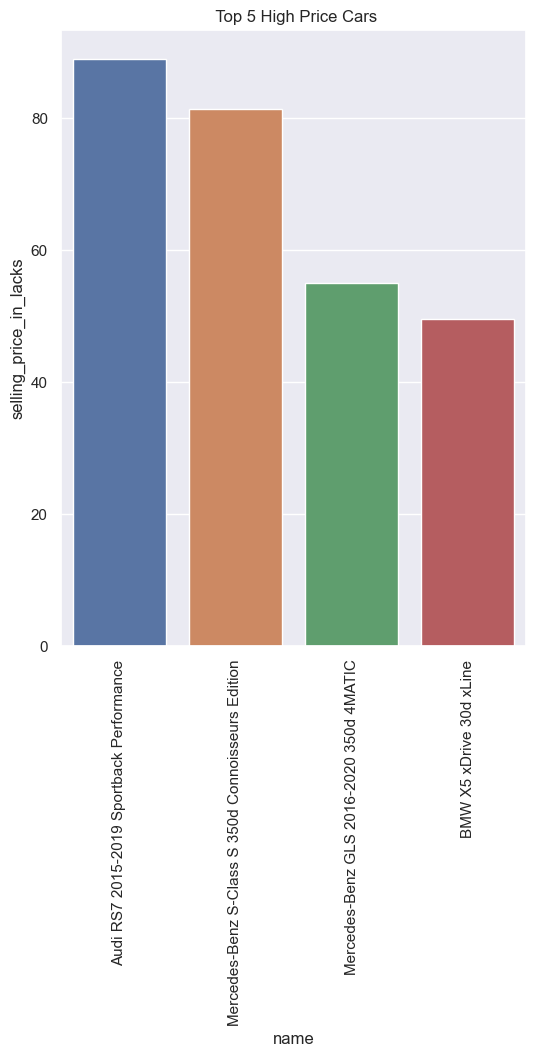

In [132]:
##Top 5 high price cars:-
r1=df[['name','selling_price_in_lacks']].sort_values(by='selling_price_in_lacks',ascending=False).head()
sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=r1,x='name',y='selling_price_in_lacks')
plt.title(' Top 5 High Price Cars')
plt.xticks(rotation=90)
plt.show()

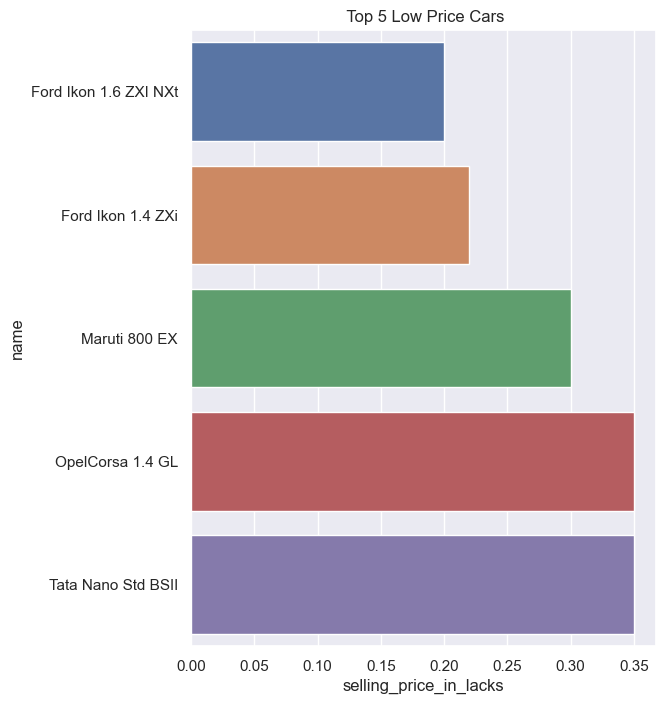

In [133]:
##Top 5 Low price Car:-
r1=df[['name','selling_price_in_lacks']].sort_values(by='selling_price_in_lacks').head()
sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=r1,x='selling_price_in_lacks',y='name')
plt.title(' Top 5 Low Price Cars')
sns.set_style('whitegrid')
plt.show()

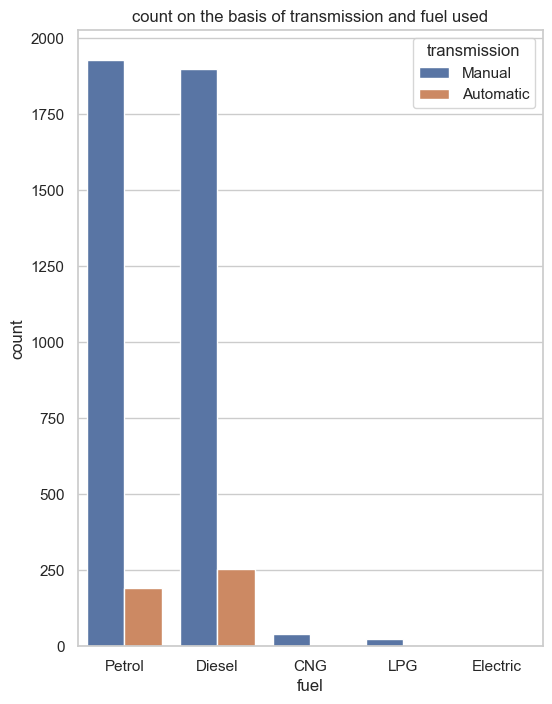

In [134]:
##Classify on the basis of transmission and fuel type:-
r2=df[['transmission','fuel']]
sns.countplot(data=r2,x='fuel',hue='transmission')
plt.title("count on the basis of transmission and fuel used")
plt.show()

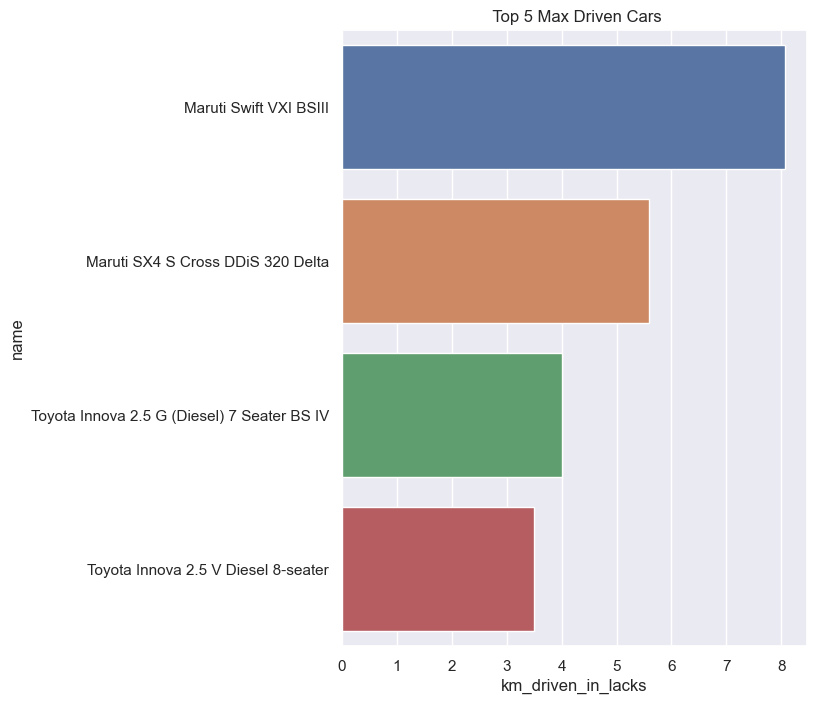

In [135]:
##Top 5 car with max driven km:-
r1=df[['name','km_driven_in_lacks']].sort_values(by='km_driven_in_lacks',ascending=False).head()
sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=r1,x='km_driven_in_lacks',y='name')
plt.title(' Top 5 Max Driven Cars')
sns.set_style('whitegrid')
plt.show()

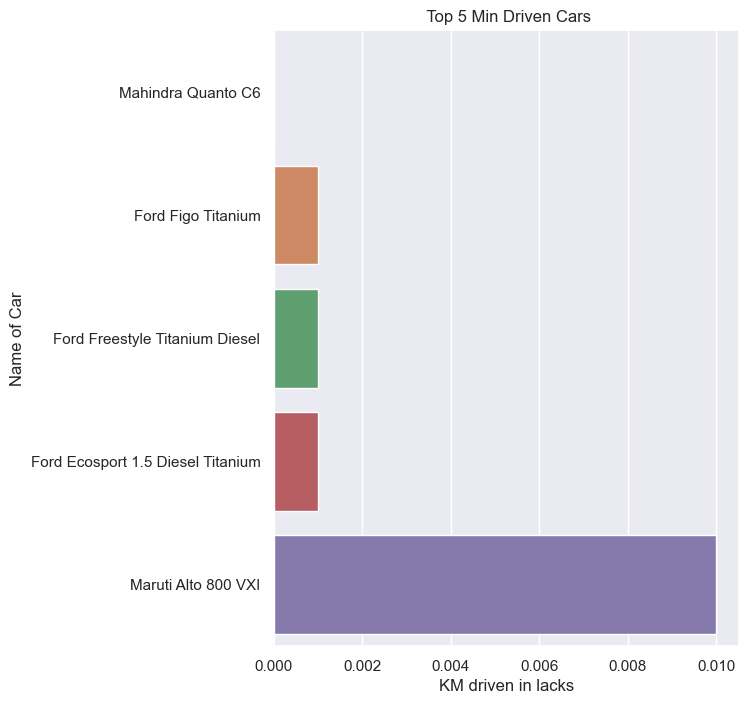

In [136]:
##Top 5 car with min driven km:-
r1=df[['name','km_driven_in_lacks']].sort_values(by='km_driven_in_lacks').head()
sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=r1,x='km_driven_in_lacks',y='name')
plt.title(' Top 5 Min Driven Cars')
plt.ylabel('Name of Car')
plt.xlabel('KM driven in lacks')
sns.set_style('whitegrid')
plt.show()

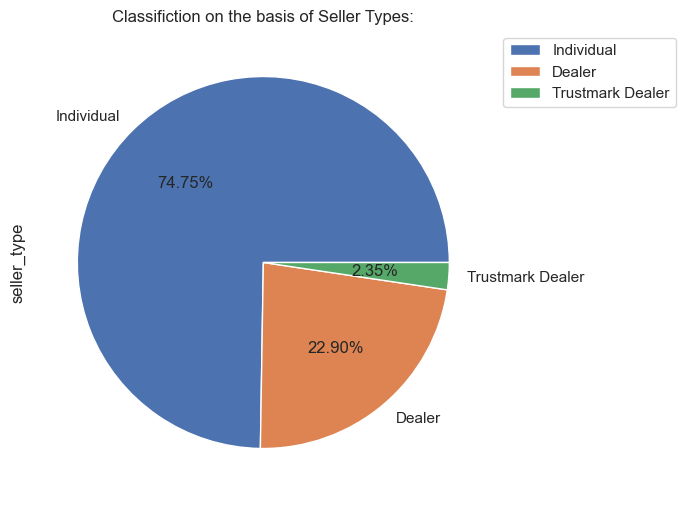

In [137]:
##Classify on the basis of seller type:-
r2=df['seller_type'].value_counts()
r2.plot.pie(autopct='%.2f%%',legend=True)
plt.legend(bbox_to_anchor=(1,0,0,1))
plt.title('Classifiction on the basis of Seller Types:')
plt.show()


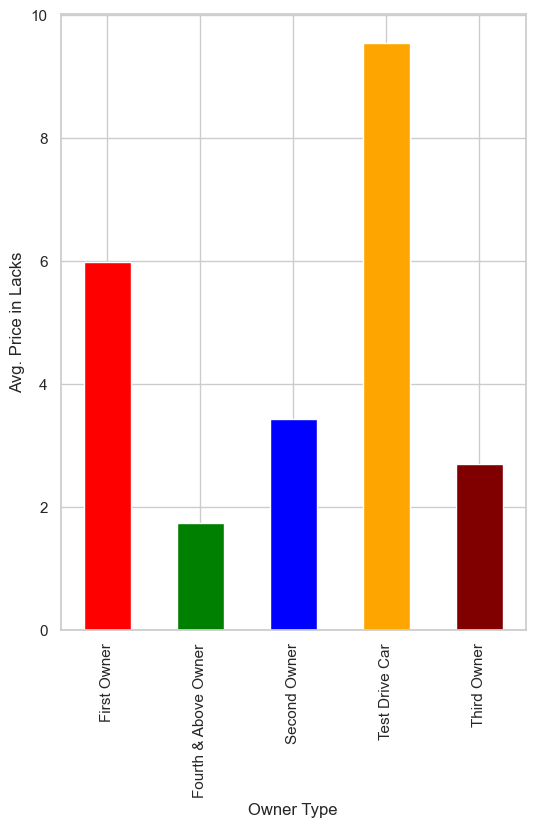

In [138]:
##Classification on the basis of owner type with avg car price:-
r4=df[['owner','selling_price_in_lacks']].groupby('owner')['selling_price_in_lacks'].mean()
r4.plot.bar(color=('red','green','blue','orange','maroon'))
plt.xlabel('Owner Type')
plt.ylabel('Avg. Price in Lacks')
plt.show()

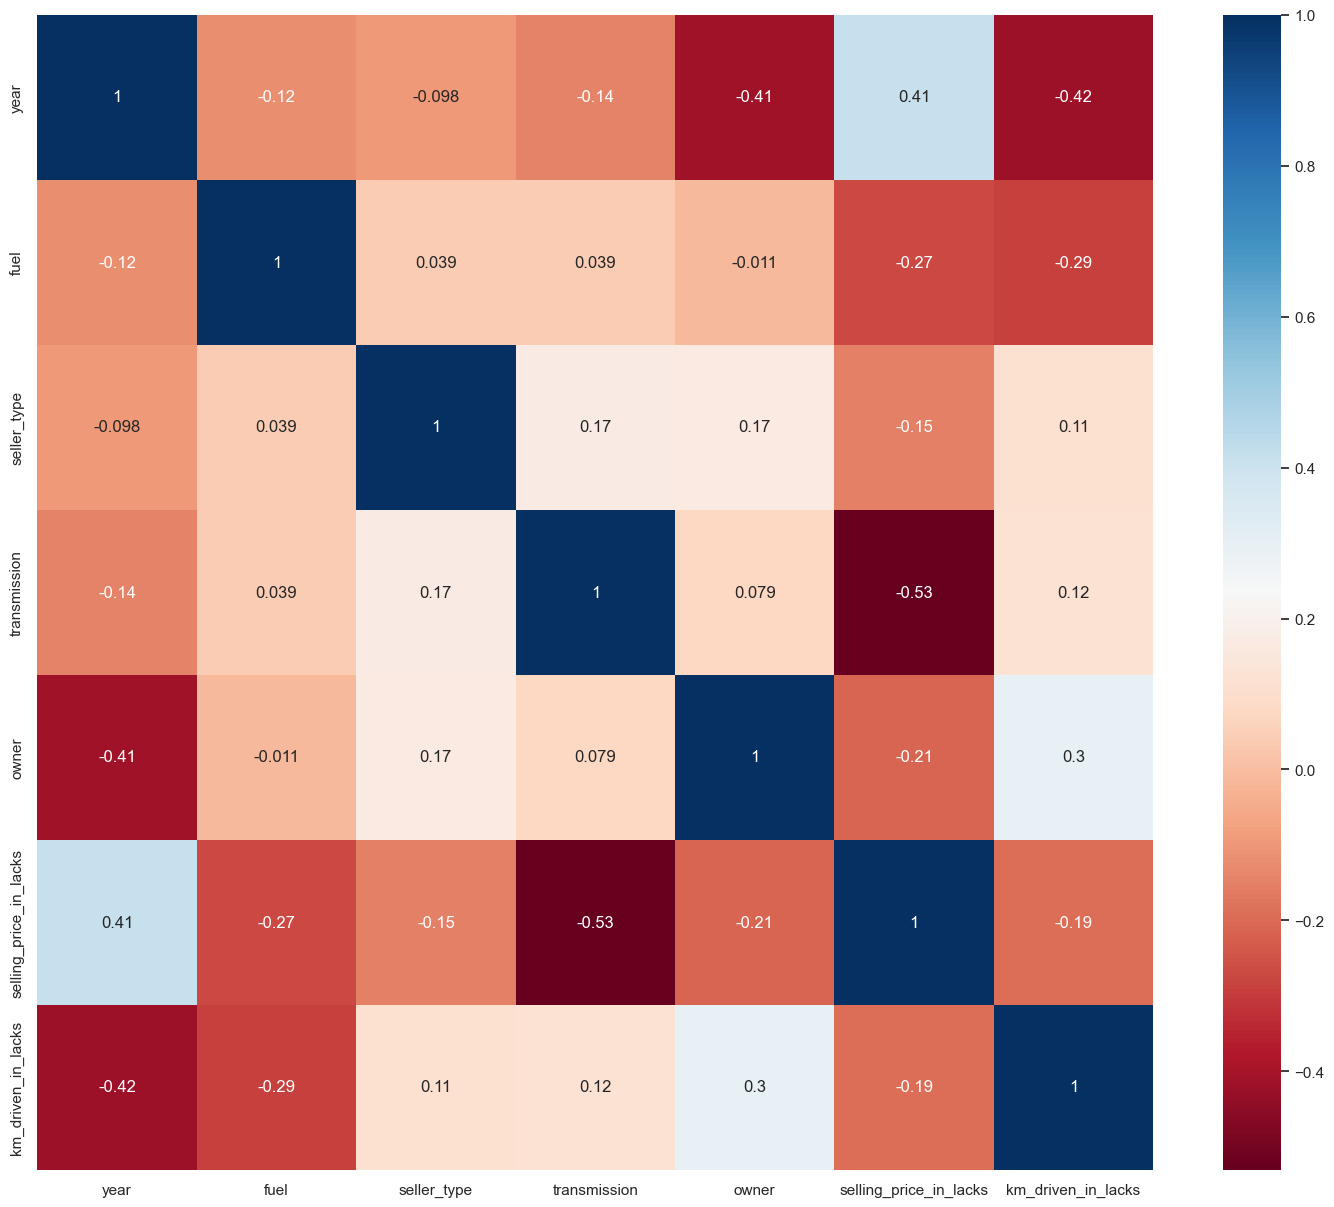

In [139]:
##Heatmap for checking corelation:-
corr=df2.corr()
plt.figure(figsize=(18,15))
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.show()

In [140]:
##Prepare Data for Machine Learning Model:-
##Selecting Independent x & Dependent y variables:-
x=df2.drop(['selling_price_in_lacks','name'],axis=1)
y=df2['selling_price_in_lacks']
print(x.shape,y.shape)
print(x)
print(y)

(4340, 6) (4340,)
      year  fuel  seller_type  transmission  owner  km_driven_in_lacks
0     2007     4            1             1      0                0.70
1     2007     4            1             1      0                0.50
2     2012     1            1             1      0                1.00
3     2017     4            1             1      0                0.46
4     2014     1            1             1      2                1.41
...    ...   ...          ...           ...    ...                 ...
4335  2014     1            1             1      2                0.80
4336  2014     1            1             1      2                0.80
4337  2009     4            1             1      2                0.83
4338  2016     1            1             1      0                0.90
4339  2016     4            1             1      0                0.40

[4340 rows x 6 columns]
0       0.60000
1       1.35000
2       6.00000
3       2.50000
4       4.50000
         ...   
4335    4

In [141]:
##Spilt the data into train and test format:-
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print('x_train_shape:',x_train.shape,'x-test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape,'y_test_shape:',y_test.shape)

x_train_shape: (3038, 6) x-test_shape: (1302, 6)
y_train_shape: (3038,) y_test_shape: (1302,)


In [143]:
##Importing the Evalution metrics and creating a function for applying that:-
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [144]:
def met(y_test,y_pred):
    print(mean_squared_error(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(r2_score(y_test,y_pred))
def mscore(model):
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))

In [145]:
##Importing ML Models:-
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [146]:
##Applying the Linear Regression Model:-
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [147]:
## prediction the value:-

y_pred_lr=lr.predict(x_test)
print(y_pred_lr.shape)

(1302,)


In [148]:
#Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_lr)

17.38668820379573
2.307335750385949
0.5003867295972513


In [149]:
mscore(lr)

Train Score 0.42440048821777177
Test Score 0.5003867295972513


In [150]:
##Applying KNN Model:-
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [151]:
## prediction the value:-

y_pred_knn=knn.predict(x_test)
print(y_pred_knn.shape)

(1302,)


In [152]:
##Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_knn)

11.396627331797518
1.7257053579109065
0.6725134662760182


In [153]:
mscore(knn)

Train Score 0.6876837779519717
Test Score 0.6725134662760182


In [154]:
##Applying Decision Tree Regressor Model:-
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [155]:
## prediction the value:-

y_pred_dt=dt.predict(x_test)
print(y_pred_dt.shape)

(1302,)


In [156]:
##Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_dt)

11.721604295810385
1.6845072216814594
0.6631751263982385


In [157]:
mscore(dt)

Train Score 0.9614993716653182
Test Score 0.6631751263982385


In [158]:
##Applying Bagging Ensemble MOdel:-
bagg=BaggingRegressor(base_estimator=dt)
bagg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [159]:
## prediction the value:-

y_pred_bagg=bagg.predict(x_test)
print(y_pred_bagg.shape)

(1302,)


In [160]:
##Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_bagg)

10.016826638275505
1.619704451711524
0.712162577648707


In [161]:
mscore(bagg)

Train Score 0.9050561263783957
Test Score 0.712162577648707


In [162]:
##Checking the best Model:
best_mod=pd.DataFrame({'Model Name':['Linear Regression','KNN','Decision Tree Regressor','Bagging Regression'],'Train Score':[lr.score(x_train,y_train),knn.score(x_train,y_train),dt.score(x_train,y_train),bagg.score(x_train,y_train)],'Test Socre':[lr.score(x_test,y_test),knn.score(x_test,y_test),dt.score(x_test,y_test),bagg.score(x_test,y_test)]})
best_mod.head()

,Model Name,Train Score,Test Socre
0,Linear Regression,0.424400,0.500387
1,KNN,0.687684,0.672513
2,Decision Tree Regressor,0.961499,0.663175
3,Bagging Regression,0.905056,0.712163


In [163]:
##So, the best Model is Bagging Regressor.
##Saving the best Model (Bagging Regressor):-
import pickle

In [164]:
pickle.dump(bagg,open('bagging.pkl','wb'))
loaded_model=pickle.load(open('bagging.pkl','rb'))

In [165]:
result=loaded_model.score(x_train,y_train)
print(result)

0.9050561263783957


In [166]:
##Creating a random dataset by selecting 20 data and checking best Model on it:-
rand_20=df2[250:270]
rand_20.to_csv('rand_20.csv')
rand_20

,name,year,fuel,seller_type,transmission,owner,selling_price_in_lacks,km_driven_in_lacks
250,Maruti Omni MPI STD BSIV,2018,4,1,1,0,2.00000,0.1000
251,Maruti Baleno Alpha 1.2,2017,4,0,1,0,6.25000,0.5200
252,Ford Fiesta Classic 1.4 SXI Duratorq,2006,1,1,1,4,1.10000,1.2000
253,Hyundai Elite i20 Asta Option BSIV,2019,4,1,1,0,8.00000,0.1124
254,Hyundai Grand i10 CRDi Magna,2017,1,0,1,0,4.90000,0.6600
255,Maruti Ertiga SHVS ZDI,2017,1,0,1,0,8.80000,0.6400
256,Hyundai Santro Xing GL Plus,2013,4,1,1,0,2.90000,0.4900
257,Tata Sumo GX TC 7 Str BSIII,2006,1,1,1,2,1.15999,1.0000
258,Renault KWID RXT,2018,4,1,1,0,3.60000,0.2650
259,Maruti 800 AC,2002,4,1,1,2,0.65000,1.0000


In [167]:
##Selecting x and y in random dataset:-
x1=rand_20.drop(['selling_price_in_lacks','name'],axis=1)
y1=rand_20['selling_price_in_lacks']
print(x.shape,y.shape)

(4340, 6) (4340,)


In [168]:
##Spliting the random dataset:-
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(15, 6) (5, 6)
(15,) (5,)


In [169]:
##Applying the saved best model:-
result=loaded_model.score(x_train,y_train)
print(result)

0.8335157538668383
